In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(18)

input_data = torch.randn(100, 100)  # batch of 1000 samples, 100 features

class DeepTanhNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.layers = nn.ModuleList()
        self.num_layers = num_layers

        self.layers.append(nn.Linear(input_size, hidden_size))

        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_size, hidden_size))

        self.activation = torch.tanh

    def forward(self, x):
        activations = []
        for i, layer in enumerate(self.layers):
            x = layer(x)
            x = self.activation(x)
            activations.append(x.detach().clone())
        return activations

model = DeepTanhNetwork(input_size=100, hidden_size=100, num_layers=10)

activations_res = []
for i in range(5):
    res = model(input_data)
    input_data = torch.tensor(res[-1])
    activations_res.append(res)

activations = [item for sublist in activations_res for item in sublist]

fig, axs = plt.subplots(50, 3, figsize=(50, 250))

for i, act in enumerate(activations):
    print(f"mean: {act.mean().item():.3f}, std: {act.std().item():.3f}")

for i, act in enumerate(activations):
    axs[i, 0].hist(act.numpy().flatten(), bins=50, color='skyblue')
    axs[i, 0].set_title(f'Layer {i+1} Activation Histogram')

    axs[i, 1].bar([0], [act.mean().item()], yerr=[act.std().item()], color='lightcoral')
    axs[i, 1].set_title(f'Layer {i+1} Mean ± Std')
    axs[i, 1].set_xlim(-1, 1)
    axs[i, 1].set_ylim(-1, 1)

    axs[i, 2].plot(act.mean(dim=0).numpy(), label='Mean per neuron')
    axs[i, 2].plot(act.std(dim=0).numpy(), label='Std per neuron')
    axs[i, 2].set_title(f'Layer {i+1} Mean and Std per Neuron')
    axs[i, 2].legend()

plt.tight_layout()
plt.show()


In [24]:
import numpy as np

D = np.random.randn(1000, 500)
n_hidden = [500] * 10
nonlinearity = ['tanh'] * len(n_hidden)

act = {'tanh': lambda x: np.tanh(x)}
Hs = {}

for i in range(len(n_hidden)):
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = n_hidden[i]
    W = np.random.randn(fan_out, fan_in) * 1.0
    H = np.dot(X, W)
    H = act[nonlinearity[i]](H)
    Hs[i] = H


input layer has mean: 0.003, std: 1.000
hidden layer 1 has mean: 0.002, std: 0.982
hidden layer 2 has mean: 0.002, std: 0.982
hidden layer 3 has mean: 0.000, std: 0.982
hidden layer 4 has mean: 0.000, std: 0.982
hidden layer 5 has mean: -0.002, std: 0.982
hidden layer 6 has mean: 0.001, std: 0.982
hidden layer 7 has mean: 0.001, std: 0.982
hidden layer 8 has mean: 0.000, std: 0.982
hidden layer 9 has mean: 0.001, std: 0.982
hidden layer 10 has mean: -0.000, std: 0.982


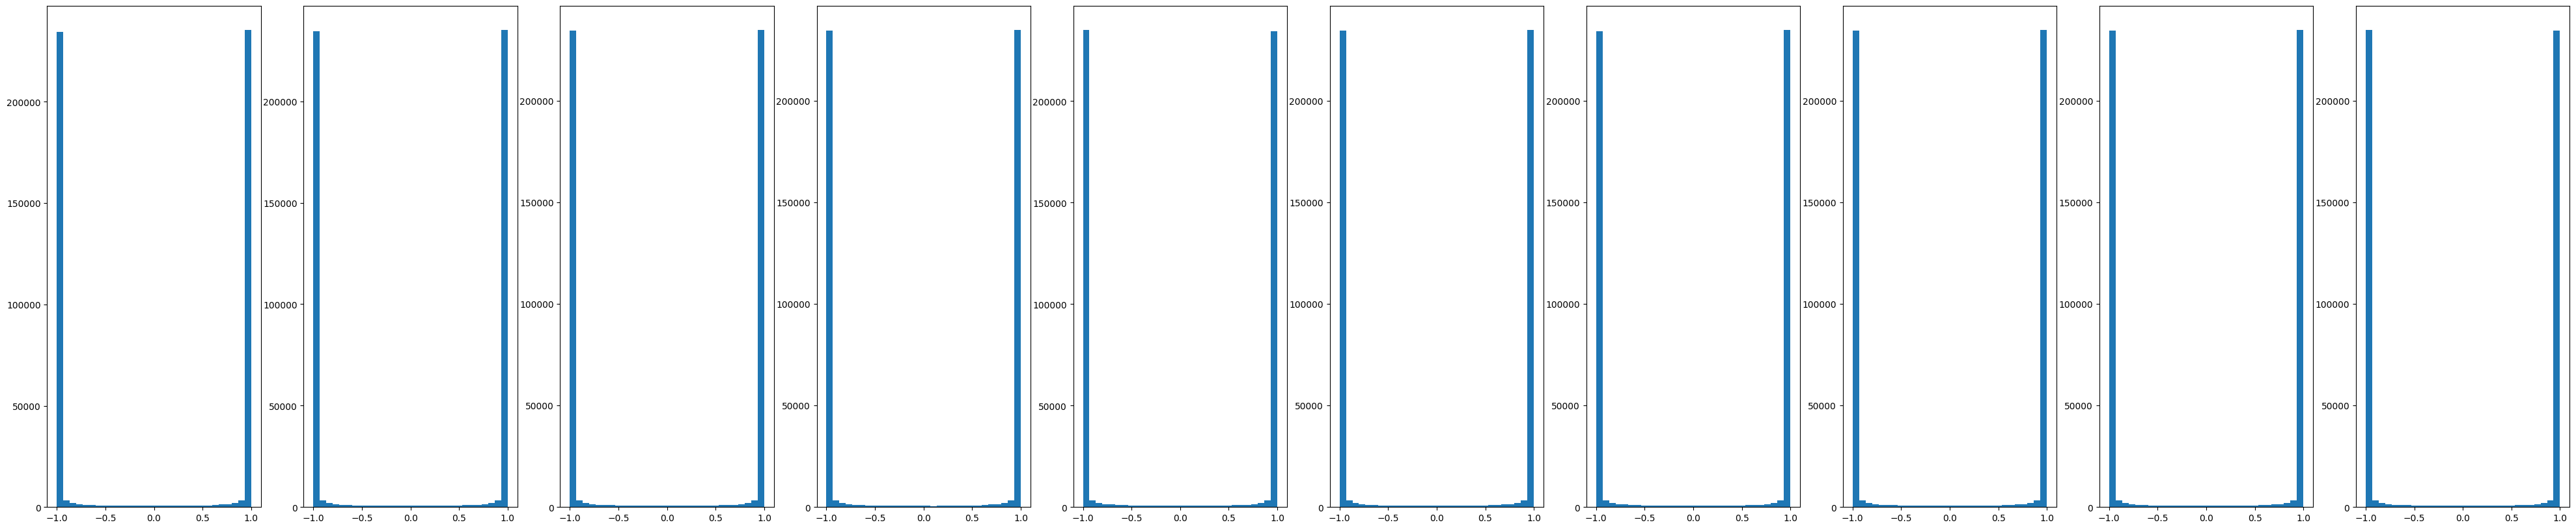

In [25]:
print(f"input layer has mean: {D.mean().item():.3f}, std: {D.std().item():.3f}")

layer_mean = [np.mean(H) for H in Hs.values()]
layer_std = [np.std(H) for H in Hs.values()]

for i, H in enumerate(Hs):
    print(f"hidden layer {i + 1} has mean: {layer_mean[i]:.3f}, std: {layer_std[i]:.3f}")

# plt.figure()
# plt.subplot(121)
# plt.plot(Hs.keys(), layer_mean, label='mean')
# plt.title('Layer mean')
# plt.subplot(122)
# plt.plot(Hs.keys(), layer_std, label='std')
# plt.title('Layer std')

plt.figure(figsize=(50, 10))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))